# **MPA-MLF - Miniproject**

## **Task - Classification of wireless transmitters**

The task will be to classify wireless transmitters based on data from measurement.

The dataset consists of 19200 samples and 9 features in total.

## Get Data

In [ ]:
!wget https://github.com/xlukac14/MPA-MLF/blob/main/Miniproject/Data_prepared_final.csv

#!wget --no-check-certificate \
#   https://github.com/xlukac14/MPA-MLF/blob/main/Miniproject/Data_prepared_final.csv

## Import Libraries

Import all libraries used for this miniproject. (some libraries might stay here unused:)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LeakyReLU, Dropout
from keras.optimizers import SGD, Adam, Nadam, Adamax
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

## Load the Dataset

Loading the dataset from the path

In [ ]:
path_to_dataset = '/content/Data_prepared_final.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

print(pd_dataset.head())

   Unnamed: 0   time [s]  cfo_meas   cfo_demod  gain_imb     iq_imb  \
0           0  45181.524      -414 -421.076324  0.076097 -46.987598   
1           1  45182.129      -414 -423.571686  0.069879 -47.852627   
2           2  45182.550      -414 -421.033936  0.061466 -48.968697   
3           3  45182.971      -414 -420.103546  0.078836 -46.756973   
4           4  45183.551      -432 -420.781097  0.066053 -47.048218   

      or_off  quadr_err    ph_err   mag_err       evm  
0 -27.219631   0.104362  1.129778  0.440299  2.059935  
1 -26.934967   0.053158  1.050010  0.431240  1.815053  
2 -27.130722  -0.045913  0.989473  0.447790  1.762053  
3 -27.005318   0.081583  1.085091  0.443476  1.894204  
4 -27.358521   0.081920  1.023701  0.465225  1.805841  


## Data Examination

Reading data from variable dataset

In [ ]:
pd_dataset

,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0,45181.524,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,1,45182.129,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,2,45182.550,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,3,45182.971,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,4,45183.551,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...,...,...
19195,19195,54245.724,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,19196,54246.340,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,19197,54246.770,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,19198,54247.379,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


In [ ]:
pd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19200 non-null  int64  
 1   time [s]    19200 non-null  float64
 2   cfo_meas    19200 non-null  int64  
 3   cfo_demod   19200 non-null  float64
 4   gain_imb    19200 non-null  float64
 5   iq_imb      19200 non-null  float64
 6   or_off      19200 non-null  float64
 7   quadr_err   19200 non-null  float64
 8   ph_err      19200 non-null  float64
 9   mag_err     19200 non-null  float64
 10  evm         19200 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.6 MB


### Columns dropping (Unnamed: 0 and time [s]).

In [ ]:
drop_columns = ['Unnamed: 0', 'time [s]']
pd_dataset = pd_dataset.drop(drop_columns, axis=1)

In [ ]:
print('pd_dataset:', pd_dataset.shape)

pd_dataset: (19200, 9)


In [ ]:
pd_dataset.head(11)   # dispalys 1st 11 rows

,cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
5,-432,-416.307983,0.093724,-45.336712,-27.172468,0.045200,1.067799,0.480190,1.903123
6,-414,-422.121307,0.074381,-47.157940,-27.254124,-0.109112,1.065073,0.473195,1.862016
7,-414,-423.967285,0.094833,-45.233143,-26.917641,-0.047091,1.039195,0.465907,1.810157
8,-432,-424.394470,0.085833,-45.142429,-26.951569,-0.055014,1.008745,0.427296,1.751380
9,-432,-420.001892,0.062082,-49.143627,-27.330563,0.062528,1.041857,0.454947,1.878264


## Data Preprocessing

In [ ]:
# Check for missing values
print(pd_dataset.isnull().sum())

scaler = StandardScaler()
data_scaled = scaler.fit_transform(pd_dataset)

cfo_meas     0
cfo_demod    0
gain_imb     0
iq_imb       0
or_off       0
quadr_err    0
ph_err       0
mag_err      0
evm          0
dtype: int64


In [ ]:
pd_dataset.head(11)

,cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
5,-432,-416.307983,0.093724,-45.336712,-27.172468,0.045200,1.067799,0.480190,1.903123
6,-414,-422.121307,0.074381,-47.157940,-27.254124,-0.109112,1.065073,0.473195,1.862016
7,-414,-423.967285,0.094833,-45.233143,-26.917641,-0.047091,1.039195,0.465907,1.810157
8,-432,-424.394470,0.085833,-45.142429,-26.951569,-0.055014,1.008745,0.427296,1.751380
9,-432,-420.001892,0.062082,-49.143627,-27.330563,0.062528,1.041857,0.454947,1.878264


### K-means and the Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

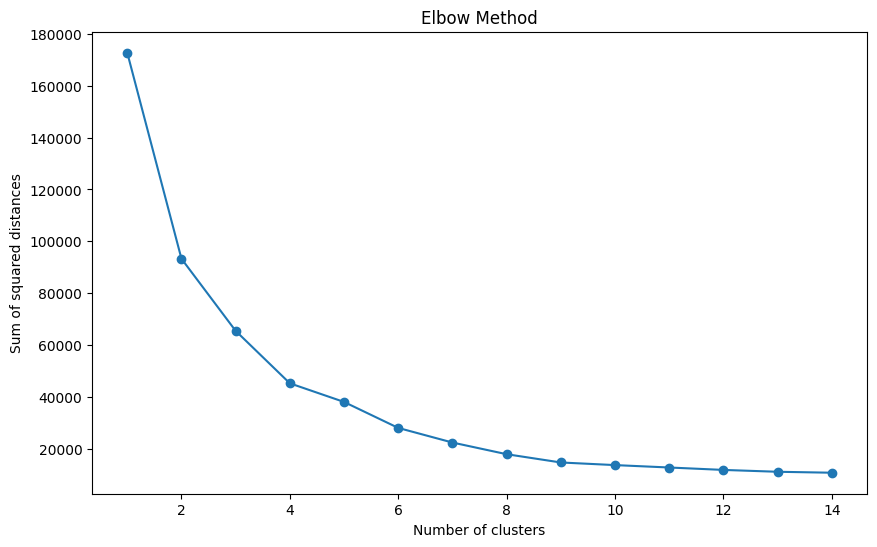

In [ ]:
# Use the elbow method to find the optimal number of clusters
all_objective = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    all_objective.append(kmeans.inertia_)

k_all = range(1, 15)

plt.figure(figsize=(10, 6))
plt.plot(k_all, all_objective, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

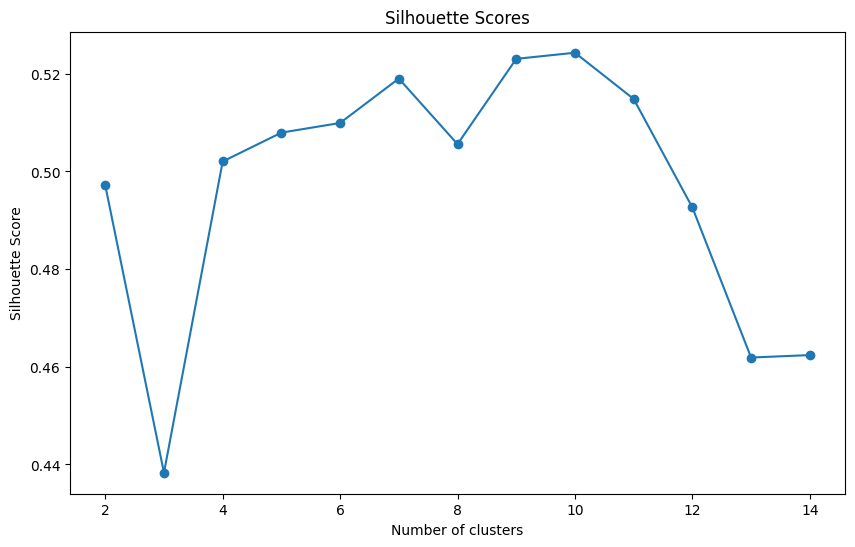

In [ ]:
silhouette_coefficients = []
# Start at 2 clusters for silhouette score
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_coefficients, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Displaying clusters

In [ ]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(data_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Analyze cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=pd_dataset.columns)
print(cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     cfo_meas   cfo_demod  gain_imb     iq_imb     or_off  quadr_err  \
0 -371.015860 -371.108753  0.067936 -36.990241 -29.184499   1.775525   
1 -374.675373 -374.447028 -0.027056 -29.838985 -36.894337  -3.671389   

     ph_err   mag_err       evm  
0  1.172929  1.408024  2.499373  
1  1.410734  3.097572  3.865160  


### Visualizing the Clusters

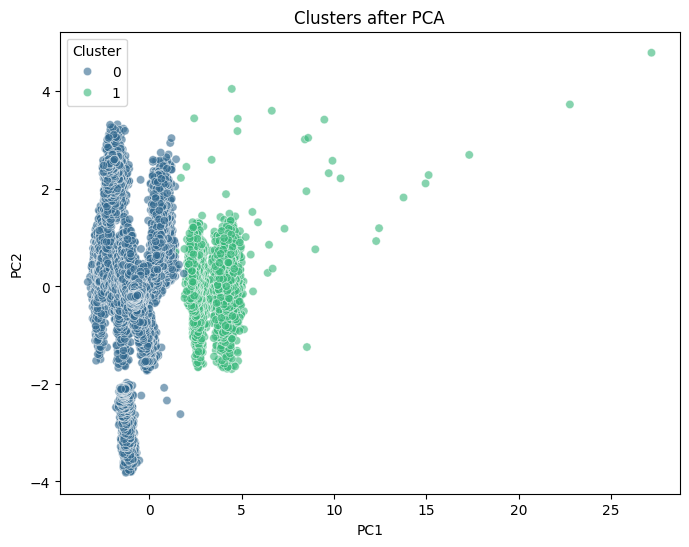

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a new DataFrame with principal component data and cluster labels
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6)
plt.title('Clusters after PCA')
plt.show()